### 로지스틱 회귀의 결정 경계 실습

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.randn(100, 2)
y = ((x[:,0] > 0.5) & (x[:, 1] > 0.5)).float()

print(x,y)

tensor([[-2.7565e-01, -4.7730e-01],
        [-1.0861e+00,  3.2101e-01],
        [ 4.2234e-01,  2.2458e-01],
        [-1.3429e+00,  4.1341e-01],
        [ 1.3204e+00,  7.9091e-01],
        [ 1.1767e+00,  8.1873e-01],
        [ 6.9534e-01,  1.0406e+00],
        [ 7.8512e-01, -6.1896e-02],
        [ 8.8756e-01,  1.2935e+00],
        [ 7.0926e-01, -9.0024e-01],
        [ 3.9039e-01,  9.4057e-01],
        [ 1.5755e+00,  8.7808e-01],
        [-9.8657e-01,  7.4925e-01],
        [ 1.7284e+00,  1.9749e+00],
        [-1.6127e-01,  5.4775e-01],
        [-2.4468e-01,  7.9068e-01],
        [ 3.4270e-01, -1.6731e-01],
        [ 1.1422e+00,  6.0920e-01],
        [ 2.1968e-01,  9.8741e-01],
        [ 7.5370e-01, -3.8777e-01],
        [-1.5691e+00, -6.5202e-01],
        [ 1.3182e+00,  1.8205e-01],
        [-3.7090e-01,  6.7890e-01],
        [ 3.6798e-01,  3.1152e-01],
        [-1.6956e+00, -1.2575e+00],
        [ 1.1762e+00,  1.0300e-01],
        [-2.8502e-01, -8.1211e-01],
        [ 9.4583e-01, -4.035

In [3]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim) :
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return F.sigmoid(out)

model = LogisticRegression(input_dim=2, output_dim=1)
print(model)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


#### 모델 학습, 결정 경계 그리기

c:\Users\Jay\anaconda3\envs\Pytorch\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


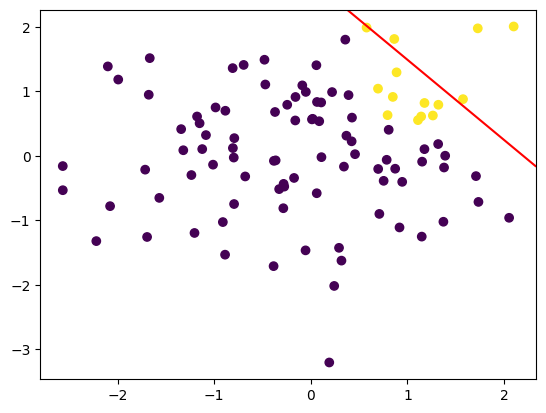

In [4]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000) :
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 결정 경계 그리기
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
"""
np.meshgrid() : x, y 좌표를 기반으로 격자 포인트 생성
xx, yy : 2차원 배열을 가집니다
"""
z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
"""
xx yy -> np.c_[] : xx yy 연결 -> torch.tensor 변경하고 ravel() -> 2차원 배열 1차원 평면화 
-> 변환된 입력 -> 모델 전달 -> .detach().numpy() 예측값을 넘파이 형태로 변환 -> z 저장
"""
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
"""
plt.contoru() : xx, yy 격자에 대응하는 결정경계 그리는 함수
"""
plt.show()